### Student Information
Name:藍裕捷

Student ID:104061202

GitHub ID:eugene08976

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# **First Part(take home exercise)**

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

/Users/eugenelan/.pyenv/versions/3.6.8/envs/eugene/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eugenelan/.pyenv/versions/3.6.8/envs/eugene/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [8]:
# get the 0th and the 10th elements from the index in the ‘category_name’ column
X.loc[X.index[[0, 10]], 'category_name']

0              comp.graphics
10    soc.religion.christian
Name: category_name, dtype: object

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [9]:
# add category to the dataframe
X['category'] = twenty_train.target

In [10]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [11]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med


In [12]:
#X[X['category_name']=='sci.med'].iloc[::10][0:5]
X.loc[lambda f: f.category_name == 'comp.graphics'].iloc[::10, :][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [15]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### The objects in arrays will be identified as null/missing value when they are none(empty is treated as none) or NaN.'NaN,'None'and'' will still be seen as a value.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [17]:
X_sample[0:4]

,text,category,category_name
568,From: vbv@r2d2.eeap.cwru.edu (Virgilio (Dean) ...,3,soc.religion.christian
46,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1856,From: kutuzova@venus.iteb.serpukhov.su Subject...,2,sci.med
1166,From: markmc@halcyon.com (Mark McWiggins) Subj...,2,sci.med


In [40]:
# Next, we check the distribution of each categories
for category in categories:
    num_origin = len(X.category_name[lambda x: x == category])
    num_sample = len(X_sample.category_name[lambda x: x == category])
    rate_origin = num_origin / len(X) * 100
    rate_sample = num_sample / len(X_sample) * 100
    print('Number of %-22s, changes from %d (%.2f%%) to %d (%.2f%%)' % \
          (category, num_origin, rate_origin, num_sample, rate_sample))

Number of alt.atheism           , changes from 480 (21.27%) to 213 (21.30%)
Number of soc.religion.christian, changes from 599 (26.54%) to 250 (25.00%)
Number of comp.graphics         , changes from 584 (25.88%) to 263 (26.30%)
Number of sci.med               , changes from 594 (26.32%) to 274 (27.40%)


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

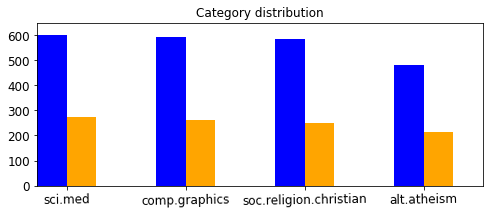

In [21]:
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],   
                                    align = "edge", width = -0.25,
                                    color =  "blue",rot = 0, fontsize = 11, figsize = (8,3))

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 650], 
                                           align = "edge", width = 0.25,
                                           color =  "orange", rot = 1, fontsize = 12, figsize = (8,3))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [44]:
analyze = count_vect.build_analyzer()

In [45]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [46]:
word = np.array(count_vect.get_feature_names())[np.where(X_counts[4, 0:100].toarray()[0] == 1)][-1]
print('word represents from the vocbulary: {}'.format(word))

word represents from the vocbulary: 01


### **>>> Exercise 11 (take home):** 
#### From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [26]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [27]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [28]:
plot_z = X_counts[0:20, 0:20].toarray()

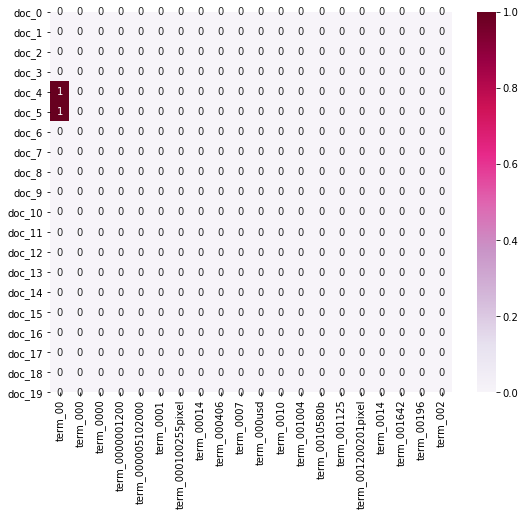

In [29]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [30]:
from sklearn.decomposition import PCA

### By adding stop_words, we can reduce the words that is relatively important. 
### I added min_df and max_df  to calulate the df, removing the words that appears too frequently or the opposite. So the reserved  is more representative. Then, by max_features, I select the top 20 words, resulting in a matrix that is not so sparse.

In [47]:
# pick top 20 words
count_vect_my = CountVectorizer(stop_words='english', max_features=20, min_df=0.01, max_df=0.8)
X_counts_my = count_vect_my.fit_transform(X.text)
analyze = count_vect_my.build_analyzer()

In [48]:
# pick top 20 documents
selected_X = np.argsort(X_counts_my.toarray().sum(1))[-20:]

In [49]:
plot_x = ["term_"+str(i) for i in count_vect_my.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in selected_X]
plot_z = X_counts_my[selected_X, :].toarray()

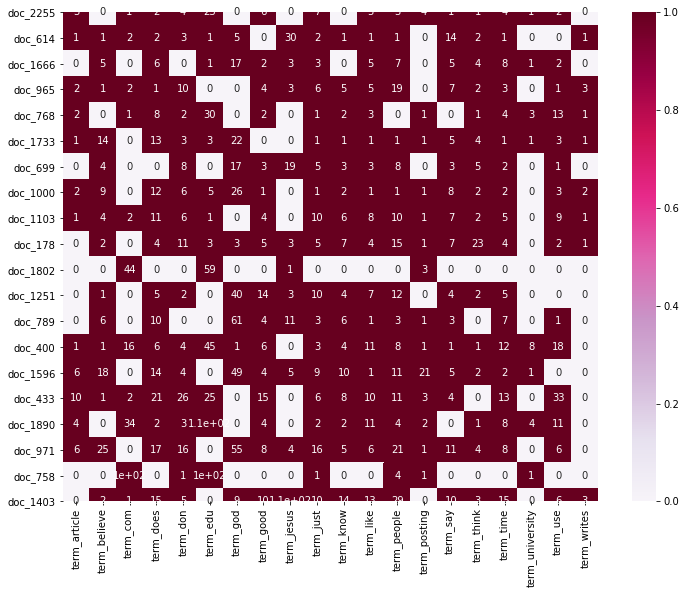

In [50]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [31]:
from mpl_toolkits.mplot3d import Axes3D

In [51]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

Text(0.5, 0, 'Z label')

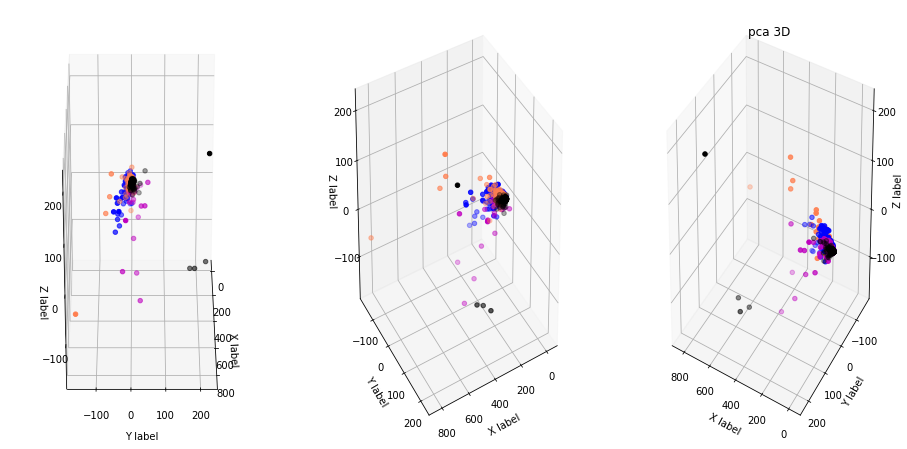

In [52]:
from mpl_toolkits.mplot3d import Axes3D

#plot settings
col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(16,8))

plt_1 = fig.add_subplot(1,3,1, projection='3d')
for category, c in zip(categories, col):
    plt_1.scatter(xs = X_reduced[X['category_name'] == category].T[0],
                 ys = X_reduced[X['category_name'] == category].T[1],
                 zs = X_reduced[X['category_name'] == category].T[2],
                 c=c, label=category, marker='o')
    
plt_2 = fig.add_subplot(1,3,2, projection='3d')
for category, c in zip(categories, col):
    plt_2.scatter(xs = X_reduced[X['category_name'] == category].T[0],
                 ys = X_reduced[X['category_name'] == category].T[1],
                 zs = X_reduced[X['category_name'] == category].T[2],
                 c=c, label=category, marker='o')
    
plt_3 = fig.add_subplot(1,3,3, projection='3d')
for category, c in zip(categories, col):
    plt_3.scatter(xs = X_reduced[X['category_name'] == category].T[0],
                 ys = X_reduced[X['category_name'] == category].T[1],
                 zs = X_reduced[X['category_name'] == category].T[2],
                 c=c, label=category, marker='o')

plt_1.view_init(30, 0)
plt_2.view_init(30, 60)
plt_3.view_init(30, 120)
plt.title('pca 3D')
plt_1.set_xlabel('X label')
plt_1.set_ylabel('Y label')
plt_1.set_zlabel('Z label')
plt_2.set_xlabel('X label')
plt_2.set_ylabel('Y label')
plt_2.set_zlabel('Z label')
plt_3.set_xlabel('X label')
plt_3.set_ylabel('Y label')
plt_3.set_zlabel('Z label')

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [63]:
import plotly.graph_objs as go

df_tf = pd.DataFrame(data = {'term' : count_vect.get_feature_names(), 'frequency' : term_frequencies})

data = {
    "type" : "bar",
    "x" : df_tf.loc[:,'term'],
    "y" : df_tf.loc[:,'frequency'],
    "marker" : {"color": "blue"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white",
    "range": [0,5000]
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [55]:
count_vect_my = CountVectorizer(stop_words='english', max_features=50, min_df=0.01, max_df=0.8)
X_counts_my = count_vect_my.fit_transform(X.text)
term_frequencies = np.asarray(X_counts_my.sum(axis=0))[0]

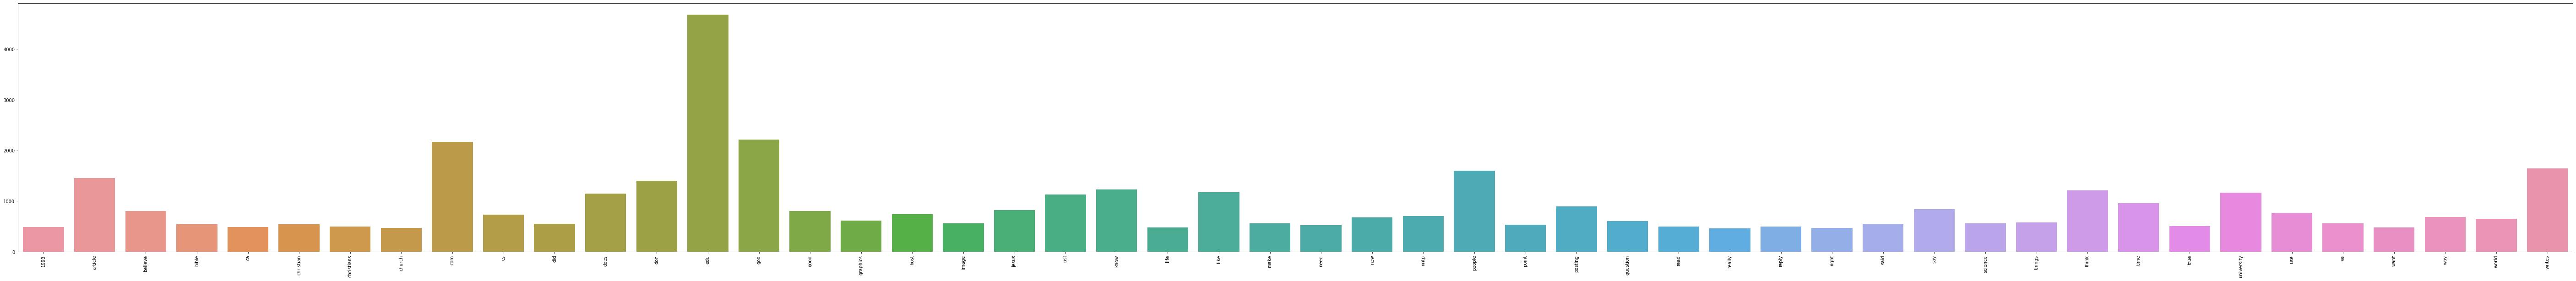

In [56]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_my.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect_my.get_feature_names(), rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

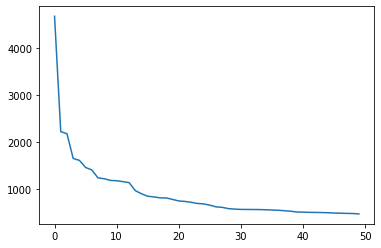

In [57]:
# Answer here
long_tail = sorted(term_frequencies, reverse=True)
plt.plot(long_tail)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [32]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [33]:
mlb = preprocessing.LabelBinarizer()

In [34]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [35]:
mlb.classes_

array([0, 1, 2, 3])

In [36]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [37]:
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [38]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [39]:
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 0, 0]"


# **Second Part**

## Data Preprocess

In [64]:
import math
import pandas as pd
import numpy as np
import nltk
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import plotly.graph_objs as go

In [70]:
imdb = pd.read_csv('imdb_labelled.txt', delimiter="\t", names=["review", "score"])
yelp = pd.read_csv('yelp_labelled.txt', delimiter="\t", names=["review", "score"])
amzn = pd.read_csv('amazon_cells_labelled.txt', delimiter="\t", names=["review", "score"])

In [71]:
def to_listoflists(x):
    final = [item.replace('\n','').split('\t') for item in x]
    for in_list in final:
        in_list[1] = int(in_list[1])
    return final

In [72]:
[amazon, imdb, yelp] = map(to_listoflists,[amazon, imdb, yelp]) # Converts all three lists into list of lists

print(amazon[:3])

[['So there is no way for me to plug it in here in the US unless I go by a converter.', 0], ['Good case, Excellent value.', 1], ['Great for the jawbone.', 1]]


In [73]:
cols = ['sentence','score']
amazon_df = pd.DataFrame(amazon, columns = cols)
imdb_df = pd.DataFrame(imdb, columns = cols)
yelp_df = pd.DataFrame(yelp, columns = cols)

print(amazon_df.head())
print(imdb_df.head())
print(yelp_df.head())
print(amazon_df.shape)
print(imdb_df.shape)
print(yelp_df.shape)

                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
                                            sentence  score
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1
                                            sentence  score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank h

In [76]:
amazon_df.drop_duplicates(keep = 'first', inplace = True)
imdb_df.drop_duplicates(keep = 'first', inplace = True)
yelp_df.drop_duplicates(keep = 'first', inplace = True)

In [79]:
print(amazon_df.shape) # 1000 rows - 10 duplicated rows = 990 rows
print(imdb_df.shape) # 1000 rows - 3 duplicated rows = 997 rows
print(yelp_df.shape) # 1000 rows - 4 duplicated rows = 996 rows

(990, 2)
(997, 2)
(996, 2)


In [77]:
sources = ['amazon','imdb','yelp']
dfs = [amazon_df,imdb_df,yelp_df]
master_df = pd.concat([df.assign(source = source) for source,df in zip(sources,dfs)], ignore_index = True)

print(master_df.head())
print(master_df.shape)

                                            sentence  score  source
0  So there is no way for me to plug it in here i...      0  amazon
1                        Good case, Excellent value.      1  amazon
2                             Great for the jawbone.      1  amazon
3  Tied to charger for conversations lasting more...      0  amazon
4                                  The mic is great.      1  amazon
(2983, 3)


In [78]:
master_df_sample = master_df.sample(2000)
print(master_df_sample.head())
print(master_df_sample.shape)

                                               sentence  score source
2482                           And then tragedy struck.      0   yelp
2744                      This is a GREAT place to eat!      1   yelp
2211  It was either too cold, not enough flavor or j...      0   yelp
1336                      The kids are very cool too.        1   imdb
1166  Artless camera-work endlessly presents us with...      0   imdb
(2000, 3)


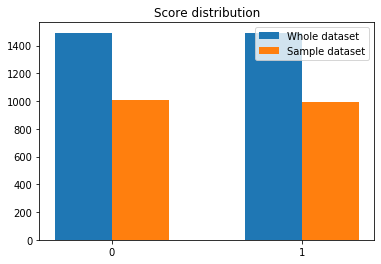

In [80]:
master_plot = pd.DataFrame(master_df.score.value_counts())
master_plot['score_sample'] = master_df_sample.score.value_counts()

ind = np.arange(len(master_plot))
width = 0.3

fig = plt.Figure(figsize = (8,5))
plt.bar(ind-width/2, master_plot['score'], width, label = 'Whole dataset')
plt.bar(ind+width/2, master_plot['score_sample'], width, label = 'Sample dataset')

plt.title('Score distribution')
plt.xticks(ind, master_plot.index)
plt.legend()
plt.show()

In [81]:
master_df['unigrams'] = master_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
master_df.head()

,sentence,score,source,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"


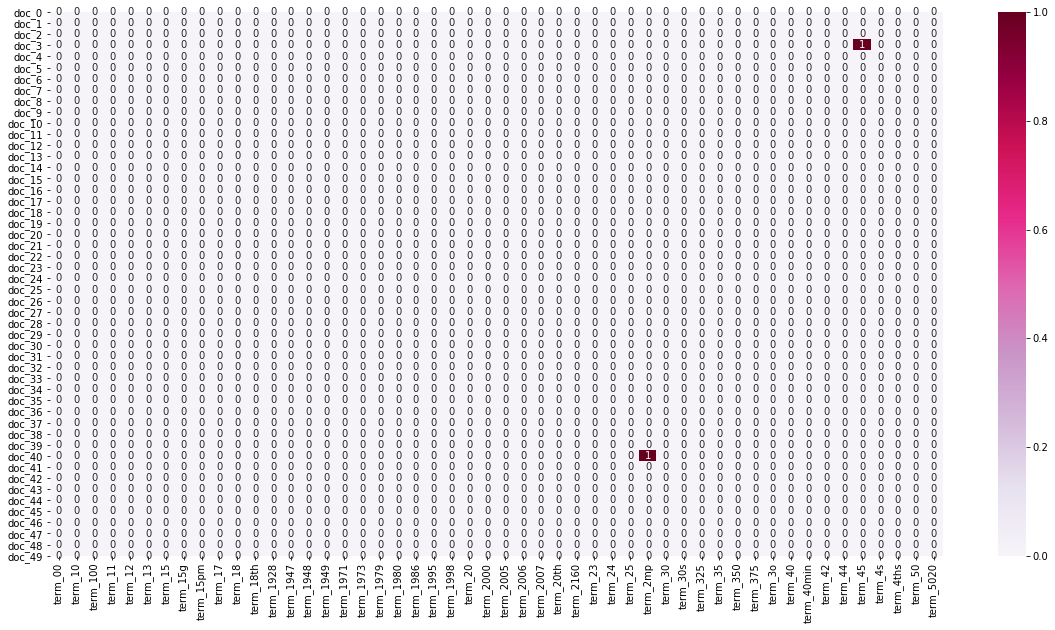

In [82]:
cv = CountVectorizer()
master_counts = cv.fit_transform(master_df.sentence)
xplot = ["term_" + str(i) for i in cv.get_feature_names()[:50]]
yplot = ["doc_" + str(i) for i in list(master_df.index)[:50]]
zplot = master_counts[:50,:50].toarray()

df_heatmap = pd.DataFrame(zplot, columns = xplot, index = yplot)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_heatmap,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

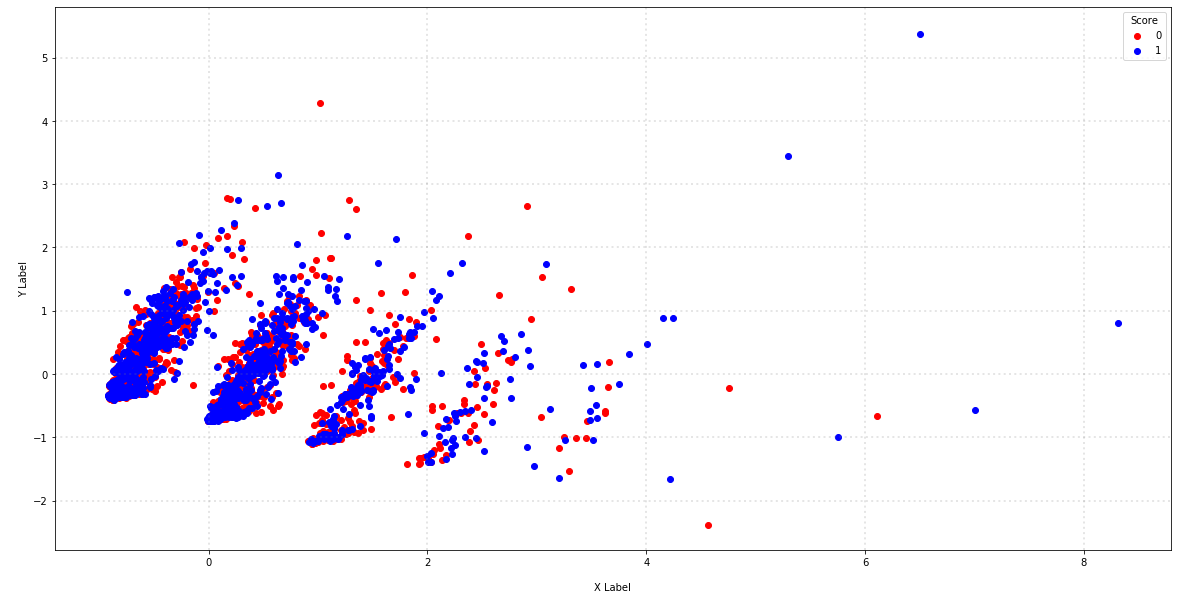

In [83]:
master_2d = PCA(n_components = 2).fit_transform(master_counts.toarray())

score = [0,1]
color = ['red', 'blue']

fig = plt.figure(figsize = (20,10))
ax = fig.subplots()

for col,scr in zip(color, score):
    xs = master_2d[master_df['score'] == scr].T[0]
    ys = master_2d[master_df['score'] == scr].T[1]
    ax.scatter(xs, ys, c = col, marker='o', label = scr)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.legend(title = 'Score')

plt.show()

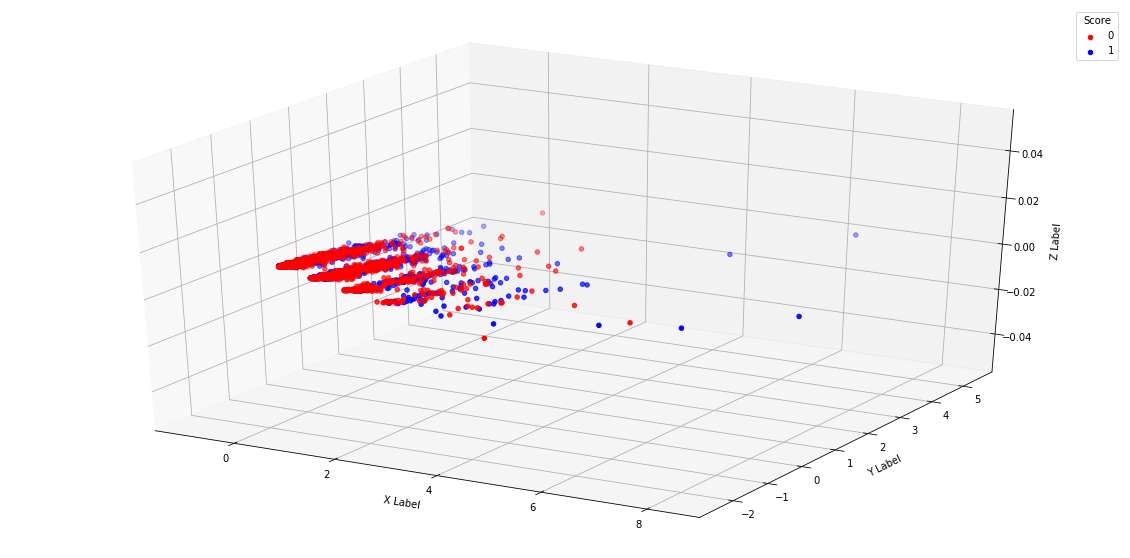

In [84]:
master_3d = PCA(n_components = 3).fit_transform(master_counts.toarray())

score = [0,1]
color = ['red', 'blue']

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

for col,scr in zip(color, score):
    xs = master_3d[master_df['score'] == scr].T[0]
    ys = master_3d[master_df['score'] == scr].T[1]
    zs = master_3d[master_df['score'] == scr].T[2]
    ax.scatter(xs, ys, c = col, marker='o', label = scr)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.legend(title = 'Score')

plt.show()

In [85]:
term_frequencies = np.asarray(master_counts.sum(axis = 0))[0] # Gets the sum of term frequency throughout all documents
term_frequencies[1]

36

In [86]:
df_tf = pd.DataFrame(data = {'term' : cv.get_feature_names(), 'frequency' : term_frequencies})
df_tf = df_tf.sort_values(by = 'frequency', ascending = False).reset_index(drop = True)

df_tf.head()

,term,frequency
0,the,1951
1,and,1138
2,it,789
3,is,752
4,to,669


In [87]:
data = {
    "type" : "bar",
    "x" : df_tf.loc[:200,'term'],
    "y" : df_tf.loc[:200,'frequency'],
    "marker" : {"color": "green"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white"
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()

In [88]:
df_tf['frequency log'] = df_tf['frequency'].apply(math.log) # Creates a new frequency logarithm column
df_tf.head()

,term,frequency,frequency log
0,the,1951,7.576097
1,and,1138,7.037028
2,it,789,6.670766
3,is,752,6.622736
4,to,669,6.505784


In [89]:
data2 = {
    "type" : "bar",
    "x" : df_tf.loc[:200,'term'],
    "y" : df_tf.loc[:200,'frequency log'],
    "marker" : {"color": "green"}
}

layout2 = {
  "title": "Word Frequency (Natural Log)", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency (Natural Log)", 
    "gridcolor": "white"
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data2], layout = layout2)
fig.show()

In [90]:
mlb1 = preprocessing.LabelBinarizer()
mlb2 = preprocessing.LabelBinarizer()
mlb1.fit(master_df.score)
mlb2.fit(master_df.source)

master_df['bin score'] = mlb1.transform(master_df['score']).tolist()
master_df['bin source'] = mlb2.transform(master_df['source']).tolist()
master_df.head()

,sentence,score,source,unigrams,bin score,bin source
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",[1],"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",[1],"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...",[0],"[1, 0, 0]"
4,The mic is great.,1,amazon,"[The, mic, is, great, .]",[1],"[1, 0, 0]"


In [91]:
sen_to_transform = master_df.sample(3)['sentence'].values.tolist() # Take sample of 3 sentences from the dataset
sen_to_transform

['I thoroughly enjoyed it when Christopher Eccleston took control of the TARDIS and the continuation of the series.  ',
 'I really loved the story line and the poler bear was kinda cute.But if anyone has a question about Fort Steele, just ask away:)  ',
 "Ray Charles' life provided excellent biographical material for the film, which goes well beyond being just another movie about a musician.  "]

In [92]:
sen_vector_count = []
sen_to_transform = [[sen] for sen in sen_to_transform]

for sen in sen_to_transform:
    sen_vector_count.append(cv.transform(sen)) # Transforms the 3 sentences into vector form using CountVectorizer
    
sen_vector_count_bin = []
for item in sen_vector_count:
    sen_vector_count_bin.append(binarize(item)) # Binarize the resulting 3 vectors

In [93]:
combinations = [[1,1],[1,2],[1,3],[2,2],[2,3],[3,3]]

for com in combinations:
    a = cosine_similarity(sen_vector_count[com[0]-1], sen_vector_count[com[1]-1], dense_output=True)
    print('Cosine similarity of sentence ' + str(com[0]) + ' and ' + str(com[1]) + ': %(x)f' %{'x':a})

Cosine similarity of sentence 1 and 1: 1.000000
Cosine similarity of sentence 1 and 2: 0.280000
Cosine similarity of sentence 1 and 3: 0.134164
Cosine similarity of sentence 2 and 2: 1.000000
Cosine similarity of sentence 2 and 3: 0.178885
Cosine similarity of sentence 3 and 3: 1.000000


# **Third Part**

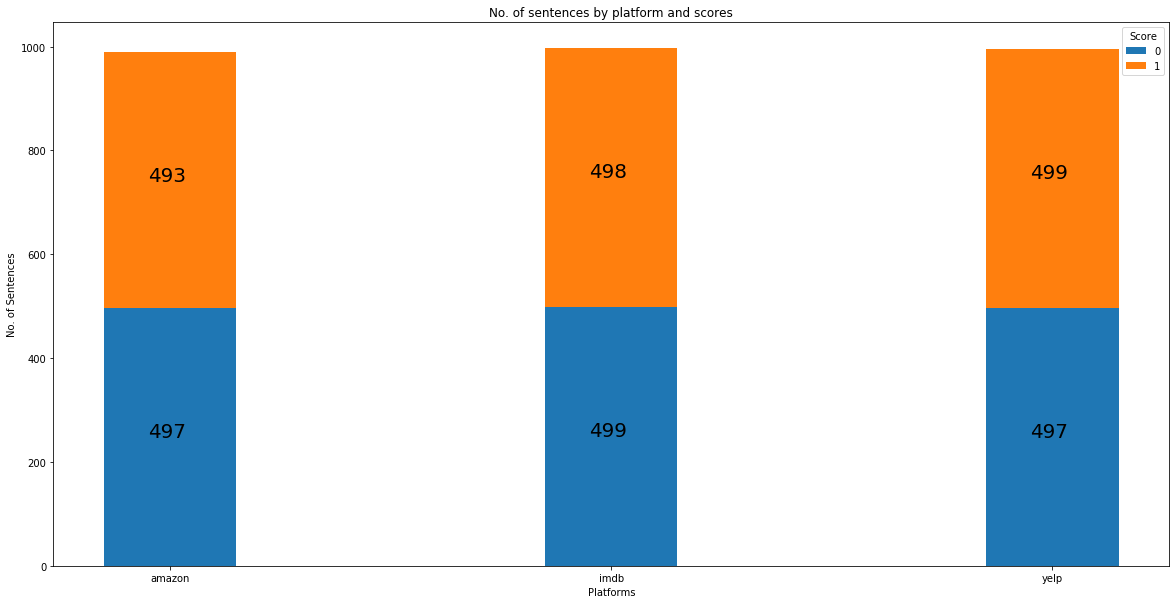

In [94]:
platforms = ['amazon', 'imdb', 'yelp']
zeros = []
ones = []

for pf in platforms:
    zeros.append(master_df[(master_df['source'] == pf) & (master_df['score'] == 0)].count()['score'])
    ones.append(master_df[(master_df['source'] == pf) & (master_df['score'] == 1)].count()['score'])

ind = np.arange(len(platforms))
width = 0.3

fig = plt.figure(figsize = (20,10))
plt.bar(ind, zeros, width, label = '0')
plt.bar(ind, ones, width, bottom = zeros, label = '1')

for xpos in ind:
    ypos = round(zeros[xpos]/2)
    plt.text(xpos-0.05, ypos, str(zeros[xpos]), c = 'black', fontsize = 20)
    ypos += ones[xpos]
    plt.text(xpos-0.05, ypos, str(ones[xpos]), c = 'black', fontsize = 20)

plt.xlabel('Platforms')
plt.ylabel('No. of Sentences')
plt.title('No. of sentences by platform and scores')
plt.xticks(ind, platforms)

plt.legend(title = 'Score')

plt.show()

In [95]:
negative = (master_df[master_df['score'] == 0])['sentence'].tolist()
negative_corpus = ' '.join(negative)

positive = (master_df[master_df['score'] == 1])['sentence'].tolist()
positive_corpus = ' '.join(positive)

Text(0.5, 1.0, 'Positive sentiment')

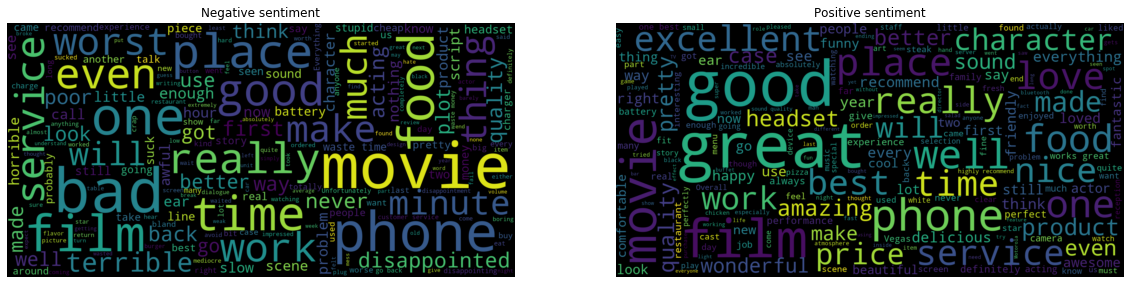

In [97]:
from wordcloud import WordCloud

wc_neg = WordCloud(width=1600, height=800, max_font_size=200).generate(negative_corpus)
wc_pos = WordCloud(width=1600, height=800, max_font_size=200).generate(positive_corpus)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.imshow(wc_neg, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative sentiment')

ax2 = fig.add_subplot(122)
ax2.imshow(wc_pos, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive sentiment')

In [98]:
from nltk.tokenize import RegexpTokenizer
master_df['clean sentence'] = master_df['sentence'].apply(lambda x: RegexpTokenizer(r'\w+').tokenize(x))
master_df['sentence word count'] = master_df['clean sentence'].apply(len)
master_df.head()

,sentence,score,source,unigrams,bin score,bin source,clean sentence,sentence word count
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1, 0, 0]","[So, there, is, no, way, for, me, to, plug, it...",21
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",[1],"[1, 0, 0]","[Good, case, Excellent, value]",4
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",[1],"[1, 0, 0]","[Great, for, the, jawbone]",4
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...",[0],"[1, 0, 0]","[Tied, to, charger, for, conversations, lastin...",12
4,The mic is great.,1,amazon,"[The, mic, is, great, .]",[1],"[1, 0, 0]","[The, mic, is, great]",4


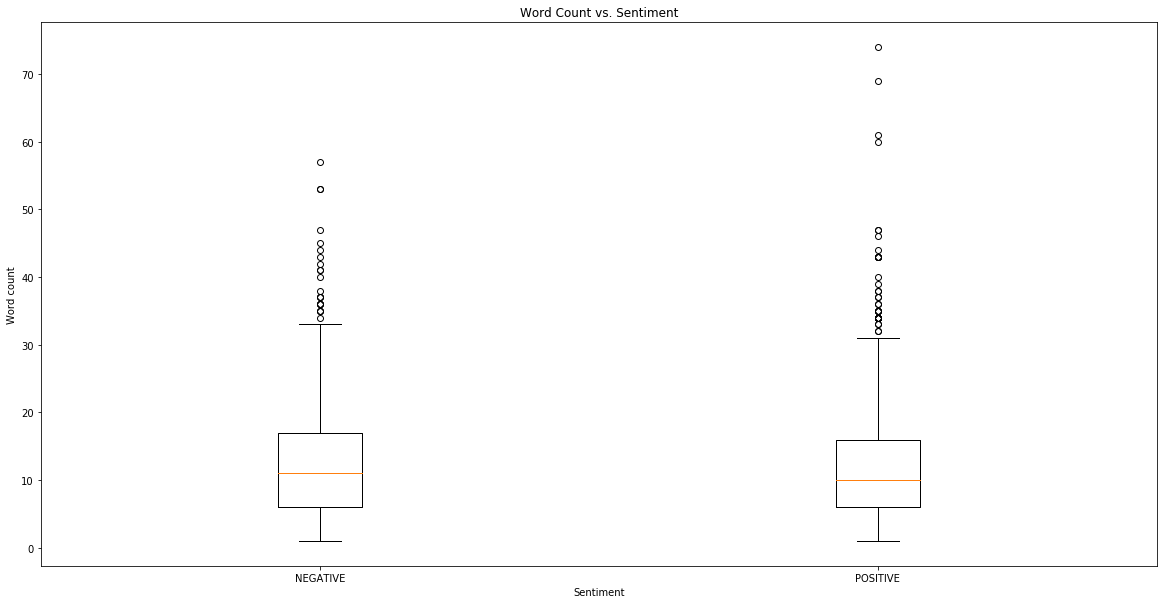

In [99]:
zeros_wcount = master_df[master_df['score'] == 0]['sentence word count'].values.tolist()
ones_wcount = master_df[master_df['score'] == 1]['sentence word count'].values.tolist()

bp_data2 = [zeros_wcount, ones_wcount]
bp_labels = ['NEGATIVE', 'POSITIVE']

fig = plt.figure(figsize = (20,10))
plt.boxplot(bp_data2, labels = bp_labels)
plt.title('Word Count vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word count')

plt.show()

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
x1 = tv.fit_transform(master_df['sentence'].tolist())
x1.shape

(2983, 5155)

In [101]:
x1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Naive Bayes Classifier 

In [107]:
y = master_df['score'].tolist()

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y) # Splits the TF-IDF data into training data and testing data

In [109]:
clf1 = naive_bayes.MultinomialNB()
clf1.fit(x1_train, y1_train) # Training the first classifier using TF-IDF data
x2 = master_counts # Document-term frequency matrix
x2.toarray()
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)

clf2 = naive_bayes.MultinomialNB()
clf2.fit(x2_train, y2_train) # Training the second classifier using term frequency data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
from sklearn import metrics

print(metrics.classification_report(y, clf1.predict(x1)))
print(metrics.confusion_matrix(y, clf1.predict(x1))) # Performance results for classifier 1 (TF-IDF)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1493
           1       0.92      0.92      0.92      1490

    accuracy                           0.92      2983
   macro avg       0.92      0.92      0.92      2983
weighted avg       0.92      0.92      0.92      2983

[[1377  116]
 [ 125 1365]]


In [106]:
print(metrics.classification_report(y, clf2.predict(x2)))
print(metrics.confusion_matrix(y, clf2.predict(x2))) # Performance results for classifier 2 (term frequency)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1493
           1       0.93      0.91      0.92      1490

    accuracy                           0.92      2983
   macro avg       0.92      0.92      0.92      2983
weighted avg       0.92      0.92      0.92      2983

[[1384  109]
 [ 132 1358]]


# **Forth Part**

One approach that could have been taken in the lab was to remove meaningless terms from the document term matrix 
For example, there were a number of terms that were only underscores and numbers. So your DTM would have values such as this: ___, 223003, adas413. These don't really contribute much to the DTM so removing them helps to reduce the dimensions.Stopwords could have also been removed from the email text as well. This would remove words such as I, they, will, could.